In [1]:
import sys
import os
import pandas as pd
sys.path.append(os.path.abspath('../Scripts'))


from XGB_Global_Surrogates import MLAlgorithms


In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score
import os

# List of dataset files
files = [
    '../Data/merged_weekly_Dambi Dollo Comprehensive  Specialized  Hospital_Q3.csv',
    '../Data/merged_weekly_lalo kile_Q3.csv',
    '../Data/merged_weekly_Dale sadi_Q3.csv',
    '../Data/merged_weekly_Hawa Gelan_Q3.csv',
    '../Data/merged_weekly_Anfilo_Q3.csv',
    '../Data/merged_weekly_Dale Wabera_Q3.csv',
    '../Data/merged_weekly_Dambi Dollo_Q3.csv',
    '../Data/merged_weekly_gawo kebe_Q3.csv',
    '../Data/merged_weekly_Gidami Primery Hospital_Q3.csv',
    '../Data/merged_weekly_Gidami_Q3.csv',
    '../Data/merged_weekly_Hawa Galan Primery Hospital_Q3.csv',
    '../Data/merged_weekly_jima horo_Q3.csv',
    '../Data/merged_weekly_kake primary hospital_Q3.csv',
    '../Data/merged_weekly_sadi chanka_Q3.csv',
    '../Data/merged_weekly_sayo_Q3.csv',
    '../Data/merged_weekly_Yemalogi Walal_Q3.csv'
]

# Lists to store the accuracies
xgb_accuracies = []
gb_accuracies = []
svr_accuracies = []
rf_accuracies = []
xgb_surrogate_accuracies = []
gb_surrogate_accuracies = []
svr_surrogate_accuracies = []
rf_surrogate_accuracies = []

# Loop over each CSV file
for file in files:
    # Load the dataset
    print(f"Processing file: {file}")
    data = pd.read_csv(file)

    # Instantiate the MLAlgorithms class with the correct target column (replace 'target' if needed)
    ml_model = MLAlgorithms(data, target_column='target')  # Change 'target' to your actual target column name

    # Preprocess the data
    ml_model.preprocess_features()

    # Train XGBoost and Gradient Boosting models, and collect accuracies
    xgb_accuracy = ml_model.train_xgboost()
    gb_accuracy = ml_model.train_gradient_boosting()
    svr_accuracy= ml_model.train_svr()
    rf_accuracy= ml_model.train_random_forest()
    # Store the results


     # ✅ Corrected: Append actual scalar values instead of lists
    xgb_accuracies.append(xgb_accuracy)
    gb_accuracies.append(gb_accuracy)
    svr_accuracies.append(svr_accuracy)
    rf_accuracies.append(rf_accuracy)

    # Surrogate models (using Decision Tree for simplicity)
    xgb_surrogate_accuracy = ml_model.train_decision_tree_surrogate("xgb")
    gb_surrogate_accuracy = ml_model.train_decision_tree_surrogate("gb")
    svr_surrogate_accuracy = ml_model.train_decision_tree_surrogate("svr")
    rf_surrogate_accuracy = ml_model.train_decision_tree_surrogate("rf")

    xgb_surrogate_accuracies.append(xgb_surrogate_accuracy)
    gb_surrogate_accuracies.append(gb_surrogate_accuracy)
    svr_surrogate_accuracies.append(svr_surrogate_accuracy)
    rf_surrogate_accuracies.append(rf_surrogate_accuracy)

# ✅ Removed unnecessary flattening

# Assuming the accuracies are lists of values for each model
for i, file in enumerate(files):
    # Fetch accuracies for the models
    xgb_accuracy = xgb_accuracies[i]
    gb_accuracy = gb_accuracies[i]
    svr_accuracy = svr_accuracies[i] if svr_accuracies[i] is not None else 'N/A'  # Handle None for SVR
    rf_accuracy = rf_accuracies[i] if rf_accuracies[i] is not None else 'N/A'  # Handle None for RF

    # Print the accuracies with conditional formatting for None
    print(f"File: {files[i]} - "
          f"XGBoost Accuracy: {xgb_accuracy:.4f}, "
          f"Gradient Boosting Accuracy: {gb_accuracy:.4f}, "
          f"SVR Accuracy (R²): {svr_accuracy if svr_accuracy == 'N/A' else svr_accuracy:.4f}, "
          f"RF Accuracy: {rf_accuracy if rf_accuracy == 'N/A' else rf_accuracy:.4f}")

Processing file: ../Data/merged_weekly_Dambi Dollo Comprehensive  Specialized  Hospital_Q3.csv
Processed 'date' column: 0   2018-01-07
1   2018-01-14
2   2018-01-21
3   2018-01-28
4   2018-02-04
Name: date, dtype: datetime64[ns]
Dropped columns: []
Extracted date features:    year  month  day  weekday  day_of_year
0  2018      1    7        6            7
1  2018      1   14        6           14
2  2018      1   21        6           21
3  2018      1   28        6           28
4  2018      2    4        6           35
Data after dropping rows with missing target values:         date        T2M  T2M_MAX  T2M_MIN       RH2M      WS2M  PRECTOTCORR  \
0 2018-01-07  19.274286    26.62    12.01  69.945714  1.940000         0.89   
1 2018-01-14  20.757143    28.01    13.40  64.150000  1.335714         0.01   
2 2018-01-21  20.290000    27.65    12.23  61.132857  1.694286         1.94   
3 2018-01-28  20.995714    29.14    13.65  62.850000  1.874286         0.81   
4 2018-02-04  21.670000   

d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 0.9683
SVR R-squared: 0.5665
Random Forest Accuracy: 0.9683


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Skipping surrogate for svr as it is a regression model.
Processing file: ../Data/merged_weekly_lalo kile_Q3.csv
Processed 'date' column: 0   2018-01-07
1   2018-01-14
2   2018-01-21
3   2018-01-28
4   2018-02-04
Name: date, dtype: datetime64[ns]
Dropped columns: ['ALLSKY_SFC_LW_DWN', 'TS', 'T2M_RANGE', 'GWETROOT']
Extracted date features:    year  month  day  weekday  day_of_year
0  2018      1    7        6            7
1  2018      1   14        6           14
2  2018      1   21        6           21
3  2018      1   28        6           28
4  2018      2    4        6           35
Data after dropping rows with missing target values:         date        T2M     T2MDEW  T2M_MAX  T2M_MIN       RH2M      WS2M  \
0 2018-01-07  17.577143  11.558571    25.33     9.56  70.411429  1.532857   
1 2018-01-14  19.517143  11.085714    27.34    11.21  60.534286  1.207143   
2 2018-01-21  19.020000  10.215714    26.83    10.08  59.375714  1.498571   
3 2018-01-28  19.597143  11.097143    28.01   

d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 0.9524
SVR R-squared: 0.5145
Random Forest Accuracy: 0.9365
Skipping surrogate for svr as it is a regression model.


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Processing file: ../Data/merged_weekly_Dale sadi_Q3.csv
Processed 'date' column: 0   2018-01-07
1   2018-01-14
2   2018-01-21
3   2018-01-28
4   2018-02-04
Name: date, dtype: datetime64[ns]
Dropped columns: ['ALLSKY_SFC_LW_DWN', 'TS', 'T2M_RANGE', 'GWETROOT']
Extracted date features:    year  month  day  weekday  day_of_year
0  2018      1    7        6            7
1  2018      1   14        6           14
2  2018      1   21        6           21
3  2018      1   28        6           28
4  2018      2    4        6           35
Data after dropping rows with missing target values:         date        T2M    T2MDEW  T2M_MAX  T2M_MIN       RH2M      WS2M  \
0 2018-01-07  18.282857  9.225714    26.47     8.96  58.954286  1.137143   
1 2018-01-14  18.134286  8.420000    27.65     6.75  58.784286  1.718571   
2 2018-01-21  18.567143  5.521429    28.81     6.54  47.901429  1.230000   
3 2018-01-28  19.727143  6.648571    29.49     9.40  47.867143  1.294286   
4 2018-02-04  21.097143  8.287

d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Accuracy: 0.9365
Skipping surrogate for svr as it is a regression model.


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Processing file: ../Data/merged_weekly_Hawa Gelan_Q3.csv
Processed 'date' column: 0   2018-01-07
1   2018-01-14
2   2018-01-21
3   2018-01-28
4   2018-02-04
Name: date, dtype: datetime64[ns]
Dropped columns: ['ALLSKY_SFC_LW_DWN', 'TS', 'T2M_RANGE', 'GWETROOT']
Extracted date features:    year  month  day  weekday  day_of_year
0  2018      1    7        6            7
1  2018      1   14        6           14
2  2018      1   21        6           21
3  2018      1   28        6           28
4  2018      2    4        6           35
Data after dropping rows with missing target values:         date        T2M     T2MDEW  T2M_MAX  T2M_MIN       RH2M      WS2M  \
0 2018-01-07  26.417143  14.701429    34.90    18.72  51.981429  2.010000   
1 2018-01-14  27.600000  14.710000    35.38    20.01  48.338571  1.880000   
2 2018-01-21  27.421429  12.858571    36.87    19.82  44.124286  2.282857   
3 2018-01-28  28.301429  13.828571    38.33    21.89  44.035714  2.341429   
4 2018-02-04  29.090000 

d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 0.9524
SVR R-squared: 0.5647
Random Forest Accuracy: 0.9365


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Skipping surrogate for svr as it is a regression model.
Processing file: ../Data/merged_weekly_Anfilo_Q3.csv
Processed 'date' column: 0   2018-01-07
1   2018-01-14
2   2018-01-21
3   2018-01-28
4   2018-02-04
Name: date, dtype: datetime64[ns]
Dropped columns: ['ALLSKY_SFC_LW_DWN', 'TS', 'T2M_RANGE', 'GWETROOT']
Extracted date features:    year  month  day  weekday  day_of_year
0  2018      1    7        6            7
1  2018      1   14        6           14
2  2018      1   21        6           21
3  2018      1   28        6           28
4  2018      2    4        6           35
Data after dropping rows with missing target values:         date        T2M     T2MDEW  T2M_MAX  T2M_MIN       RH2M      WS2M  \
0 2018-01-07  19.274286  13.195714    26.62    12.01  69.945714  1.940000   
1 2018-01-14  20.757143  13.222857    28.01    13.40  64.150000  1.335714   
2 2018-01-21  20.290000  12.012857    27.65    12.23  61.132857  1.694286   
3 2018-01-28  20.995714  13.058571    29.14    13

d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 0.8254
SVR R-squared: 0.3063
Random Forest Accuracy: 0.8571
Skipping surrogate for svr as it is a regression model.


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Processing file: ../Data/merged_weekly_Dale Wabera_Q3.csv
Processed 'date' column: 0   2018-01-07
1   2018-01-14
2   2018-01-21
3   2018-01-28
4   2018-02-04
Name: date, dtype: datetime64[ns]
Dropped columns: ['ALLSKY_SFC_LW_DWN', 'TS', 'T2M_RANGE', 'GWETROOT']
Extracted date features:    year  month  day  weekday  day_of_year
0  2018      1    7        6            7
1  2018      1   14        6           14
2  2018      1   21        6           21
3  2018      1   28        6           28
4  2018      2    4        6           35
Data after dropping rows with missing target values:         date        T2M     T2MDEW  T2M_MAX  T2M_MIN       RH2M      WS2M  \
0 2018-01-07  17.577143  11.558571    25.33     9.56  70.411429  1.532857   
1 2018-01-14  19.517143  11.085714    27.34    11.21  60.534286  1.207143   
2 2018-01-21  19.020000  10.215714    26.83    10.08  59.375714  1.498571   
3 2018-01-28  19.597143  11.097143    28.01    11.64  61.080000  1.717143   
4 2018-02-04  20.530000

d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Accuracy: 0.9683
Skipping surrogate for svr as it is a regression model.


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Processing file: ../Data/merged_weekly_Dambi Dollo_Q3.csv
Processed 'date' column: 0   2018-01-07
1   2018-01-14
2   2018-01-21
3   2018-01-28
4   2018-02-04
Name: date, dtype: datetime64[ns]
Dropped columns: ['ALLSKY_SFC_LW_DWN', 'TS', 'T2M_RANGE', 'GWETROOT']
Extracted date features:    year  month  day  weekday  day_of_year
0  2018      1    7        6            7
1  2018      1   14        6           14
2  2018      1   21        6           21
3  2018      1   28        6           28
4  2018      2    4        6           35
Data after dropping rows with missing target values:         date        T2M     T2MDEW  T2M_MAX  T2M_MIN       RH2M      WS2M  \
0 2018-01-07  19.274286  13.195714    26.62    12.01  69.945714  1.940000   
1 2018-01-14  20.757143  13.222857    28.01    13.40  64.150000  1.335714   
2 2018-01-21  20.290000  12.012857    27.65    12.23  61.132857  1.694286   
3 2018-01-28  20.995714  13.058571    29.14    13.65  62.850000  1.874286   
4 2018-02-04  21.670000

d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Accuracy: 0.8254


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Skipping surrogate for svr as it is a regression model.
Processing file: ../Data/merged_weekly_gawo kebe_Q3.csv
Processed 'date' column: 0   2018-01-07
1   2018-01-14
2   2018-01-21
3   2018-01-28
4   2018-02-04
Name: date, dtype: datetime64[ns]
Dropped columns: ['ALLSKY_SFC_LW_DWN', 'TS', 'T2M_RANGE', 'GWETROOT']
Extracted date features:    year  month  day  weekday  day_of_year
0  2018      1    7        6            7
1  2018      1   14        6           14
2  2018      1   21        6           21
3  2018      1   28        6           28
4  2018      2    4        6           35
Data after dropping rows with missing target values:         date        T2M     T2MDEW  T2M_MAX  T2M_MIN       RH2M      WS2M  \
0 2018-01-07  17.577143  11.558571    25.33     9.56  70.411429  1.532857   
1 2018-01-14  19.517143  11.085714    27.34    11.21  60.534286  1.207143   
2 2018-01-21  19.020000  10.215714    26.83    10.08  59.375714  1.498571   
3 2018-01-28  19.597143  11.097143    28.01   

d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 0.9206
SVR R-squared: 0.5891
Random Forest Accuracy: 0.9524


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Skipping surrogate for svr as it is a regression model.
Processing file: ../Data/merged_weekly_Gidami Primery Hospital_Q3.csv
Processed 'date' column: 0   2018-01-07
1   2018-01-14
2   2018-01-21
3   2018-01-28
4   2018-02-04
Name: date, dtype: datetime64[ns]
Dropped columns: ['ALLSKY_SFC_LW_DWN', 'TS', 'T2M_RANGE', 'GWETROOT']
Extracted date features:    year  month  day  weekday  day_of_year
0  2018      1    7        6            7
1  2018      1   14        6           14
2  2018      1   21        6           21
3  2018      1   28        6           28
4  2018      2    4        6           35
Data after dropping rows with missing target values:         date        T2M     T2MDEW  T2M_MAX  T2M_MIN       RH2M      WS2M  \
0 2018-01-07  23.862857  11.701429    32.62    16.55  49.731429  2.561429   
1 2018-01-14  25.138571  11.384286    34.44    17.20  45.767143  1.927143   
2 2018-01-21  25.034286   9.824286    34.36    17.87  41.474286  2.422857   
3 2018-01-28  25.814286  10.8700

d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 0.8571
SVR R-squared: 0.2805
Random Forest Accuracy: 0.8889


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Skipping surrogate for svr as it is a regression model.
Processing file: ../Data/merged_weekly_Gidami_Q3.csv
Processed 'date' column: 0   2018-01-07
1   2018-01-14
2   2018-01-21
3   2018-01-28
4   2018-02-04
Name: date, dtype: datetime64[ns]
Dropped columns: ['ALLSKY_SFC_LW_DWN', 'TS', 'T2M_RANGE', 'GWETROOT']
Extracted date features:    year  month  day  weekday  day_of_year
0  2018      1    7        6            7
1  2018      1   14        6           14
2  2018      1   21        6           21
3  2018      1   28        6           28
4  2018      2    4        6           35
Data after dropping rows with missing target values:         date        T2M     T2MDEW  T2M_MAX  T2M_MIN       RH2M      WS2M  \
0 2018-01-07  23.862857  11.701429    32.62    16.55  49.731429  2.561429   
1 2018-01-14  25.138571  11.384286    34.44    17.20  45.767143  1.927143   
2 2018-01-21  25.034286   9.824286    34.36    17.87  41.474286  2.422857   
3 2018-01-28  25.814286  10.870000    35.65    19

d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 0.8730
SVR R-squared: 0.3676
Random Forest Accuracy: 0.8730


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Skipping surrogate for svr as it is a regression model.
Processing file: ../Data/merged_weekly_Hawa Galan Primery Hospital_Q3.csv
Processed 'date' column: 0   2018-01-07
1   2018-01-14
2   2018-01-21
3   2018-01-28
4   2018-02-04
Name: date, dtype: datetime64[ns]
Dropped columns: ['ALLSKY_SFC_LW_DWN', 'TS', 'T2M_RANGE', 'GWETROOT']
Extracted date features:    year  month  day  weekday  day_of_year
0  2018      1    7        6            7
1  2018      1   14        6           14
2  2018      1   21        6           21
3  2018      1   28        6           28
4  2018      2    4        6           35
Data after dropping rows with missing target values:         date        T2M     T2MDEW  T2M_MAX  T2M_MIN       RH2M      WS2M  \
0 2018-01-07  17.577143  11.558571    25.33     9.56  70.411429  1.532857   
1 2018-01-14  19.517143  11.085714    27.34    11.21  60.534286  1.207143   
2 2018-01-21  19.020000  10.215714    26.83    10.08  59.375714  1.498571   
3 2018-01-28  19.597143  11.

d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 0.9365
SVR R-squared: 0.5274
Random Forest Accuracy: 0.9206


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Skipping surrogate for svr as it is a regression model.
Processing file: ../Data/merged_weekly_jima horo_Q3.csv
Processed 'date' column: 0   2018-01-07
1   2018-01-14
2   2018-01-21
3   2018-01-28
4   2018-02-04
Name: date, dtype: datetime64[ns]
Dropped columns: ['ALLSKY_SFC_LW_DWN', 'TS', 'T2M_RANGE', 'GWETROOT']
Extracted date features:    year  month  day  weekday  day_of_year
0  2018      1    7        6            7
1  2018      1   14        6           14
2  2018      1   21        6           21
3  2018      1   28        6           28
4  2018      2    4        6           35
Data after dropping rows with missing target values:         date        T2M    T2MDEW  T2M_MAX  T2M_MIN       RH2M      WS2M  \
0 2018-01-07  17.854286  9.582857    27.05    10.94  62.990000  1.378571   
1 2018-01-14  19.165714  9.450000    28.55    12.20  57.545714  1.177143   
2 2018-01-21  19.480000  7.542857    29.19    11.01  50.812857  1.425714   
3 2018-01-28  20.548571  9.345714    30.06    12.1

d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8254
Gradient Boosting Accuracy: 0.8095
SVR R-squared: 0.0677
Random Forest Accuracy: 0.8413


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Skipping surrogate for svr as it is a regression model.
Processing file: ../Data/merged_weekly_kake primary hospital_Q3.csv
Processed 'date' column: 0   2018-01-07
1   2018-01-14
2   2018-01-21
3   2018-01-28
4   2018-02-04
Name: date, dtype: datetime64[ns]
Dropped columns: ['ALLSKY_SFC_LW_DWN', 'TS', 'T2M_RANGE', 'GWETROOT']
Extracted date features:    year  month  day  weekday  day_of_year
0  2018      1    7        6            7
1  2018      1   14        6           14
2  2018      1   21        6           21
3  2018      1   28        6           28
4  2018      2    4        6           35
Data after dropping rows with missing target values:         date        T2M     T2MDEW  T2M_MAX  T2M_MIN       RH2M      WS2M  \
0 2018-01-07  17.577143  11.558571    25.33     9.56  70.411429  1.532857   
1 2018-01-14  19.517143  11.085714    27.34    11.21  60.534286  1.207143   
2 2018-01-21  19.020000  10.215714    26.83    10.08  59.375714  1.498571   
3 2018-01-28  19.597143  11.097143

d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 0.8730
SVR R-squared: 0.2034
Random Forest Accuracy: 0.8730


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Skipping surrogate for svr as it is a regression model.
Processing file: ../Data/merged_weekly_sadi chanka_Q3.csv
Processed 'date' column: 0   2018-01-07
1   2018-01-14
2   2018-01-21
3   2018-01-28
4   2018-02-04
Name: date, dtype: datetime64[ns]
Dropped columns: ['ALLSKY_SFC_LW_DWN', 'TS', 'T2M_RANGE', 'GWETROOT']
Extracted date features:    year  month  day  weekday  day_of_year
0  2018      1    7        6            7
1  2018      1   14        6           14
2  2018      1   21        6           21
3  2018      1   28        6           28
4  2018      2    4        6           35
Data after dropping rows with missing target values:         date        T2M     T2MDEW  T2M_MAX  T2M_MIN       RH2M      WS2M  \
0 2018-01-07  17.577143  11.558571    25.33     9.56  70.411429  1.532857   
1 2018-01-14  19.517143  11.085714    27.34    11.21  60.534286  1.207143   
2 2018-01-21  19.020000  10.215714    26.83    10.08  59.375714  1.498571   
3 2018-01-28  19.597143  11.097143    28.01 

d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8730
Gradient Boosting Accuracy: 0.9048
SVR R-squared: 0.4133
Random Forest Accuracy: 0.8889


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Skipping surrogate for svr as it is a regression model.
Processing file: ../Data/merged_weekly_sayo_Q3.csv
Processed 'date' column: 0   2018-01-07
1   2018-01-14
2   2018-01-21
3   2018-01-28
4   2018-02-04
Name: date, dtype: datetime64[ns]
Dropped columns: ['ALLSKY_SFC_LW_DWN', 'TS', 'T2M_RANGE', 'GWETROOT']
Extracted date features:    year  month  day  weekday  day_of_year
0  2018      1    7        6            7
1  2018      1   14        6           14
2  2018      1   21        6           21
3  2018      1   28        6           28
4  2018      2    4        6           35
Data after dropping rows with missing target values:         date        T2M     T2MDEW  T2M_MAX  T2M_MIN       RH2M      WS2M  \
0 2018-01-07  17.577143  11.558571    25.33     9.56  70.411429  1.532857   
1 2018-01-14  19.517143  11.085714    27.34    11.21  60.534286  1.207143   
2 2018-01-21  19.020000  10.215714    26.83    10.08  59.375714  1.498571   
3 2018-01-28  19.597143  11.097143    28.01    11.6

d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 0.9206
SVR R-squared: 0.4956
Random Forest Accuracy: 0.9365


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Skipping surrogate for svr as it is a regression model.
Processing file: ../Data/merged_weekly_Yemalogi Walal_Q3.csv
Processed 'date' column: 0   2018-01-07
1   2018-01-14
2   2018-01-21
3   2018-01-28
4   2018-02-04
Name: date, dtype: datetime64[ns]
Dropped columns: ['ALLSKY_SFC_LW_DWN', 'TS', 'T2M_RANGE', 'GWETROOT']
Extracted date features:    year  month  day  weekday  day_of_year
0  2018      1    7        6            7
1  2018      1   14        6           14
2  2018      1   21        6           21
3  2018      1   28        6           28
4  2018      2    4        6           35
Data after dropping rows with missing target values:         date        T2M     T2MDEW  T2M_MAX  T2M_MIN       RH2M      WS2M  \
0 2018-01-07  17.577143  11.558571    25.33     9.56  70.411429  1.532857   
1 2018-01-14  19.517143  11.085714    27.34    11.21  60.534286  1.207143   
2 2018-01-21  19.020000  10.215714    26.83    10.08  59.375714  1.498571   
3 2018-01-28  19.597143  11.097143    28.

d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Accuracy: 0.9683
SVR R-squared: 0.6483
Random Forest Accuracy: 0.9683


d:\Malaria data\malaria-outbreak-classifcation_prediction\env\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:05:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Skipping surrogate for svr as it is a regression model.
File: ../Data/merged_weekly_Dambi Dollo Comprehensive  Specialized  Hospital_Q3.csv - XGBoost Accuracy: 0.9524, Gradient Boosting Accuracy: 0.9683, SVR Accuracy (R²): 0.5665, RF Accuracy: 0.9683
File: ../Data/merged_weekly_lalo kile_Q3.csv - XGBoost Accuracy: 0.9524, Gradient Boosting Accuracy: 0.9524, SVR Accuracy (R²): 0.5145, RF Accuracy: 0.9365
File: ../Data/merged_weekly_Dale sadi_Q3.csv - XGBoost Accuracy: 0.9206, Gradient Boosting Accuracy: 0.9048, SVR Accuracy (R²): 0.4652, RF Accuracy: 0.9365
File: ../Data/merged_weekly_Hawa Gelan_Q3.csv - XGBoost Accuracy: 0.9365, Gradient Boosting Accuracy: 0.9524, SVR Accuracy (R²): 0.5647, RF Accuracy: 0.9365
File: ../Data/merged_weekly_Anfilo_Q3.csv - XGBoost Accuracy: 0.8571, Gradient Boosting Accuracy: 0.8254, SVR Accuracy (R²): 0.3063, RF Accuracy: 0.8571
File: ../Data/merged_weekly_Dale Wabera_Q3.csv - XGBoost Accuracy: 0.9524, Gradient Boosting Accuracy: 0.9524, SVR Accuracy (R²

In [3]:
# Ensure ml_model is instantiated
fidelity_score = ml_model.calculate_spearman_fidelity(xgb_accuracies, xgb_surrogate_accuracies)
print(f"Spearman Correlation (Fidelity Score) for XGBoost: {fidelity_score}")
gb_fidelity_score = ml_model.calculate_spearman_fidelity(gb_accuracies, gb_surrogate_accuracies)
print(f"Spearman Correlation (Fidelity Score) for Gradient Boosting: {gb_fidelity_score}")

svr_fidelity_score = ml_model.calculate_spearman_fidelity(svr_accuracies, svr_surrogate_accuracies)
print(f"Spearman Correlation (Fidelity Score) for SVR: {svr_fidelity_score}")

rf_fidelity_score = ml_model.calculate_spearman_fidelity(rf_accuracies, rf_surrogate_accuracies)
print(f"Spearman Correlation (Fidelity Score) for Random Forest: {rf_fidelity_score}")

Spearman Correlation (Fidelity Score) for XGBoost: 0.8607558542821157
Spearman Correlation (Fidelity Score) for Gradient Boosting: 0.7911250020424264
Spearman Correlation (Fidelity Score) for SVR: nan
Spearman Correlation (Fidelity Score) for Random Forest: 0.830282615801365


d:\Malaria data\malaria-outbreak-classifcation_prediction\Scripts\XGB_Global_Surrogates.py:189: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, _ = spearmanr(accuracies, surrogate_accuracies)


In [8]:
accuracies = {
    "xgb": xgb_accuracies,
    "gb": gb_accuracies,
    "svr": svr_accuracies,
    "rf": rf_accuracies
}

surrogate_accuracies = {
    "xgb": xgb_surrogate_accuracies,
    "gb": gb_surrogate_accuracies,
    "svr": svr_surrogate_accuracies,
    "rf": rf_surrogate_accuracies
}

ml_model.save_results_to_csv(accuracies, surrogate_accuracies, files, filename="accuracy.csv")

PermissionError: [Errno 13] Permission denied: 'accuracy.csv'

Error: An unexpected issue occurred: 'right center' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'


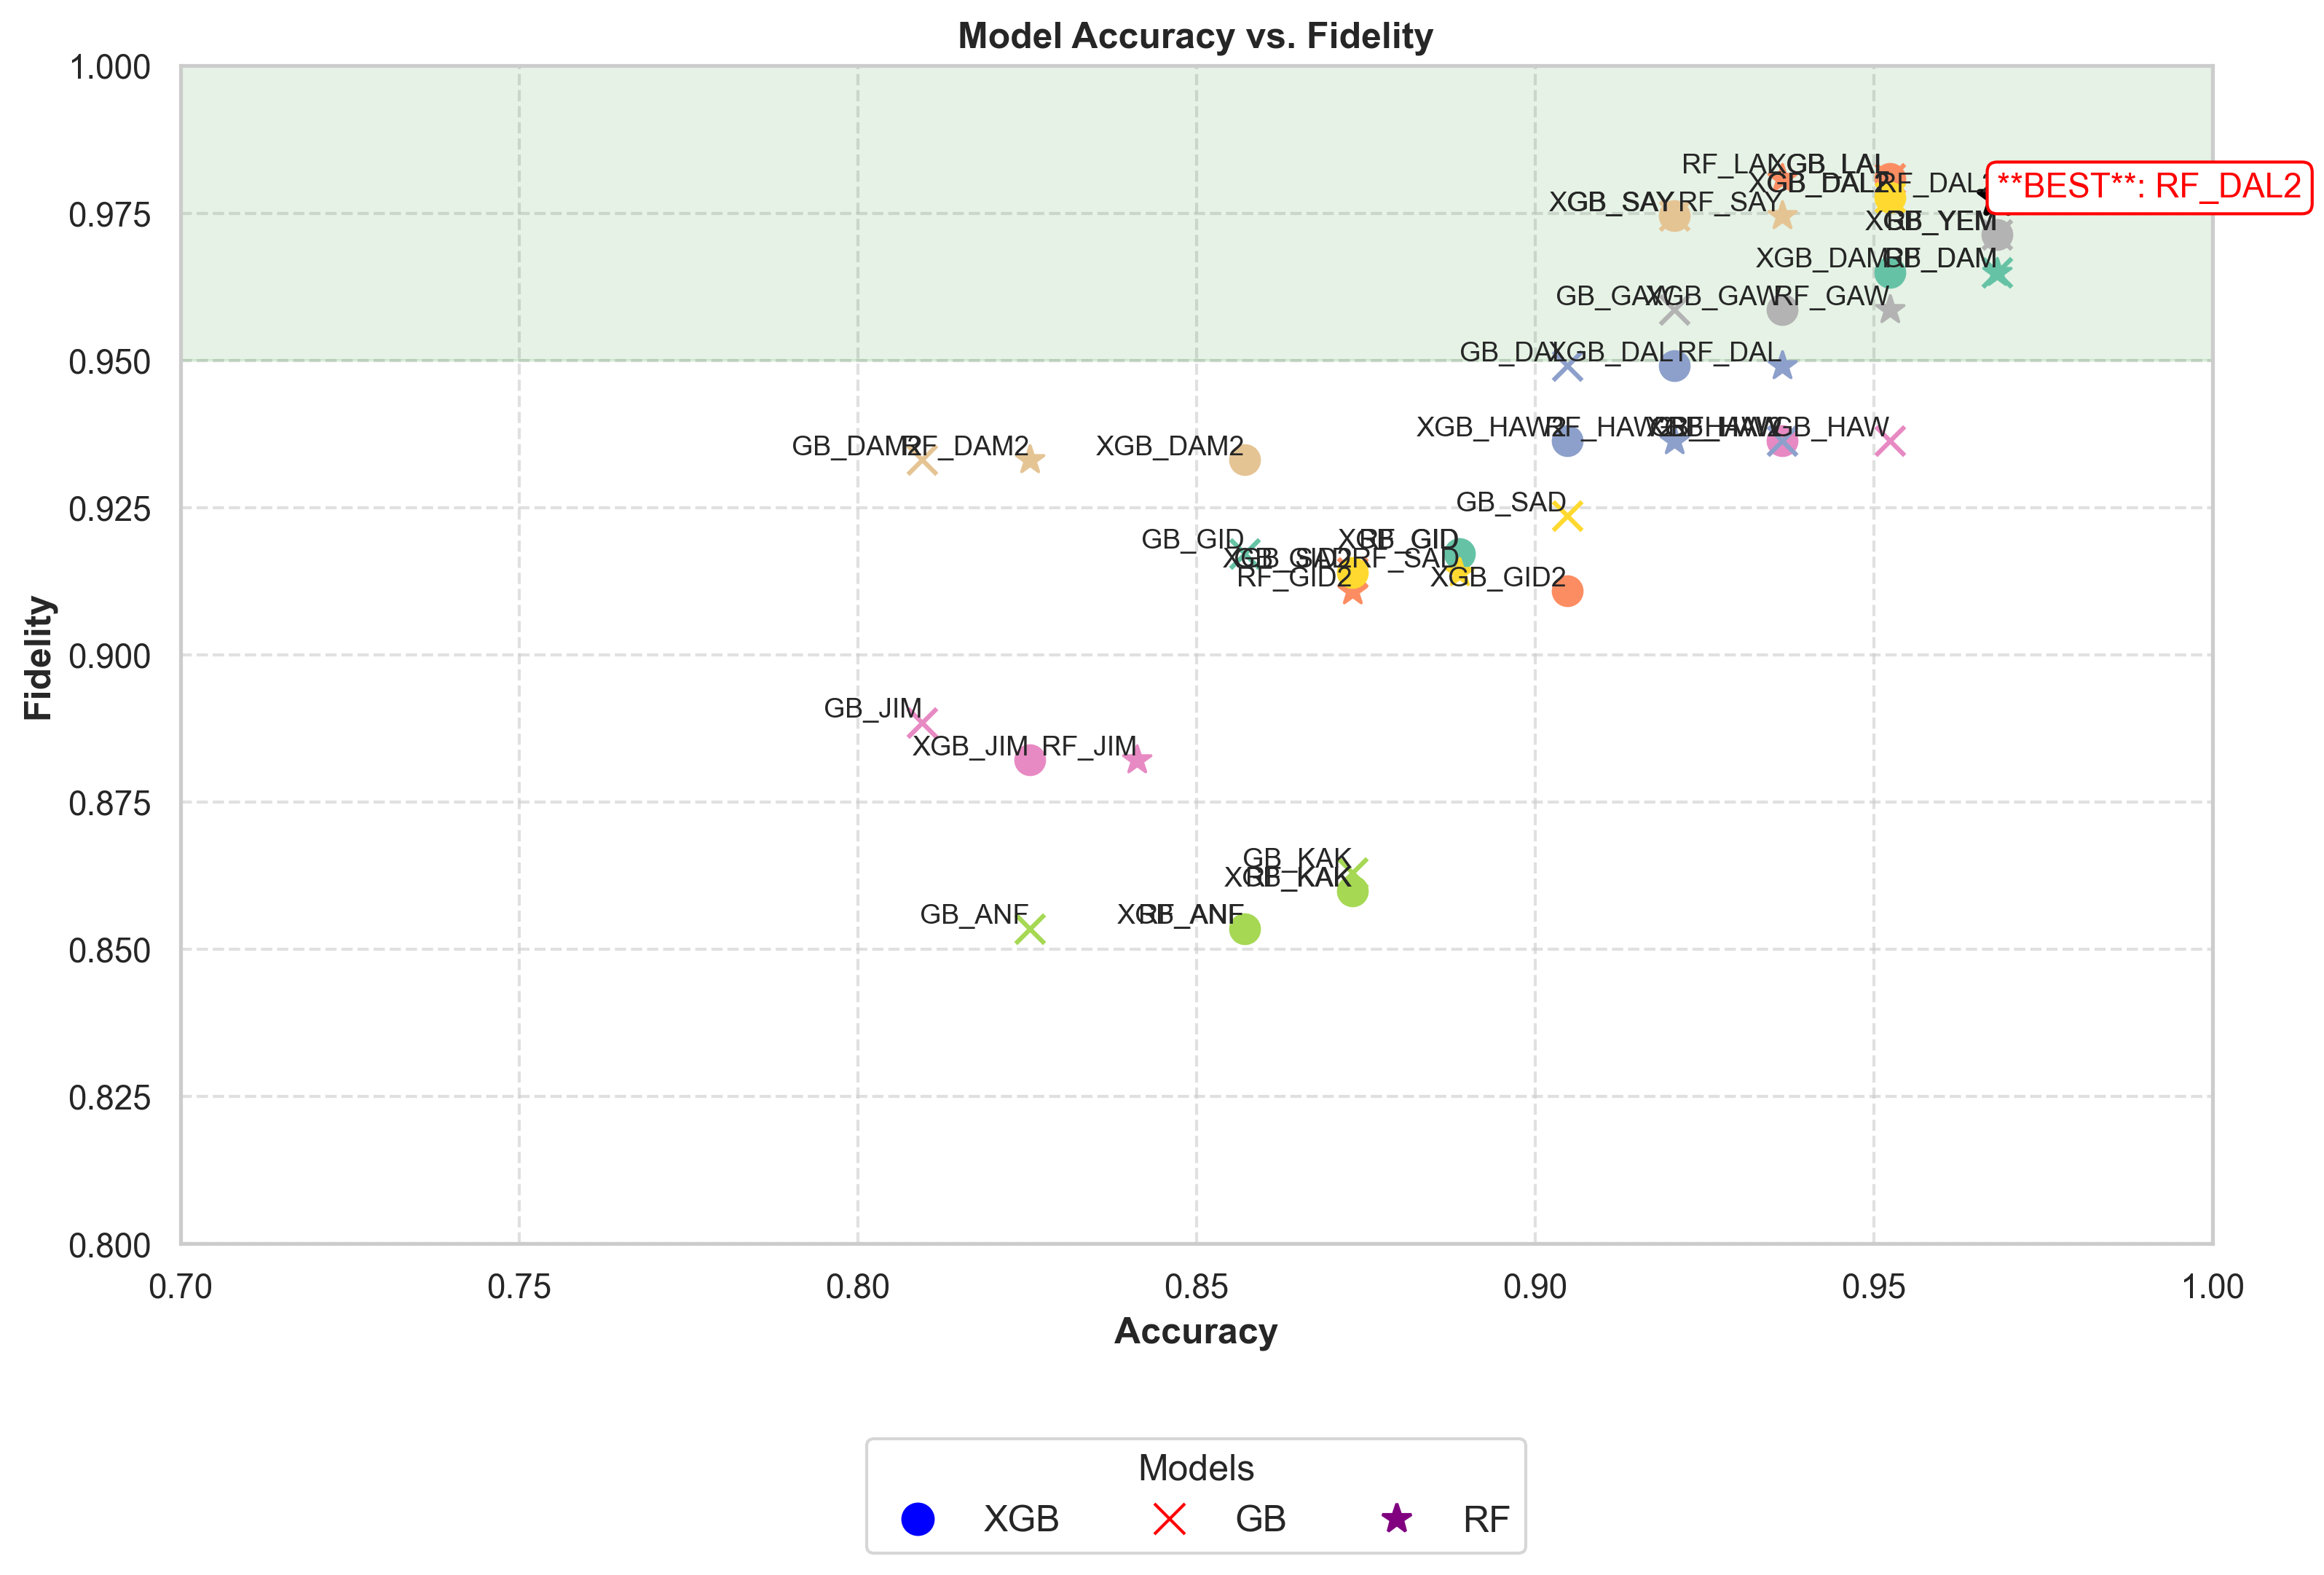

In [6]:
ml_model.plot_accuracy_vs_fidelity(accuracies, surrogate_accuracies, files)